# Business Problem

Caliber Supplies is a trusted retailer of high-quality office products. Over the years, consumer spending behaviors have undergone significant changes, creating a corresponding shift in businesses' sales tactics. In light of this, Caliber Supplies is embarking on the launch of a new product line. However, launching such a line can be expensive, prompting the company to seek the most cost-effective techniques for its sales endeavors. The company has tested three different sales strategies: email, phone calls, and the combination of email and phone calls, to sell the new product line. The company wants to know the **differences** in performance among the three sales methods and which sales strategy among the three is the **best**?

# Product Sales Methods

**Email**: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.

**Call**: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.

**Email and call**: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

# Data Information

**week**: Week sale was made, counted as weeks since product launch.

**sales_method**: Character, which of the three sales methods were used for that customer.

**customer_id**: Character, unique identifier for the customer.

**nb_sold**: Numeric, number of new products sold.

**revenue**: Numeric, revenue from the sales, rounded to 2 decimal places.

**years_as_customer**: Numeric, number of years customer has been buying from us (company founded in 1984).

**nb_site_visits**: Numeric, number of times the customer has visited our website in the last 6 months.

**state**: Character, location of the customer i.e. where orders are.

# Explanatory Questions

- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar

In [1]:
# import libraries 
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizations
import seaborn as sns #visualizations

In [2]:
#read in the csv file
product_df = pd.read_csv('product_sales.csv')

# view first five rows
product_df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# get information on dataframe including column names, datatypes,non-null counts etc.
product_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


We can see a difference in non-null count in the **revenue** column. There looks to be 1,074 missing values.

# Explanatory Data Analysis

## Null Values / Missing Values

Using seaborn to create a simple heatmap to see where we have null values.

<AxesSubplot:>

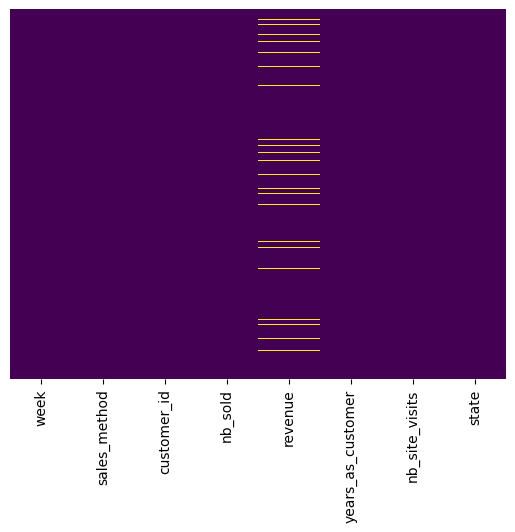

In [4]:
sns.heatmap(product_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
null_product = product_df.isnull()
null_ctr = null_product.sum() # provides a total amount of null values in a column.
total_nulls = null_ctr.sum() # provides a total amount of null values in the entire dataframe.

# print statements for cleaner and clear output
print("Null value counts per column:")
print(null_ctr)
print("Total null value count:", total_nulls)

Null value counts per column:
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
Total null value count: 1074


Roughly 7% **(7.16% ; 1074/15000)** of the Revenue data is missing. The proportion of Revenue missing is likely small enough for reasonable replacement with imputation. But first, lets look the distribution of nulls in the Revenue column.

## Distribution of nulls by sales method

In [6]:
# Grouping the data by sales_method and counting null values in revenue
null_counts = product_df.groupby('sales_method')['revenue'].apply(lambda x: x.isnull().sum())

print(null_counts)


sales_method
Call            181
Email           544
Email + Call    349
Name: revenue, dtype: int64


After printing out the null counts of the sales methods, it seems that there are are **two** misspellings: 'em + call' & 'email'. These should both be **Email + Call** and **Email**. Lets fix this before proceeding.

In [7]:
# correct the misspelled values in sales_method
product_df["sales_method"] = product_df["sales_method"].replace("em + call", "Email + Call")
product_df["sales_method"] = product_df["sales_method"].replace("email", "Email")

In [8]:
# save changes to csv file
product_df.to_csv('product_sales.csv', index=False)

In [9]:
# confirm changes and new value counts.
product_df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [10]:
fixed_null_counts = product_df.groupby('sales_method')['revenue'].apply(lambda x: x.isnull().sum())

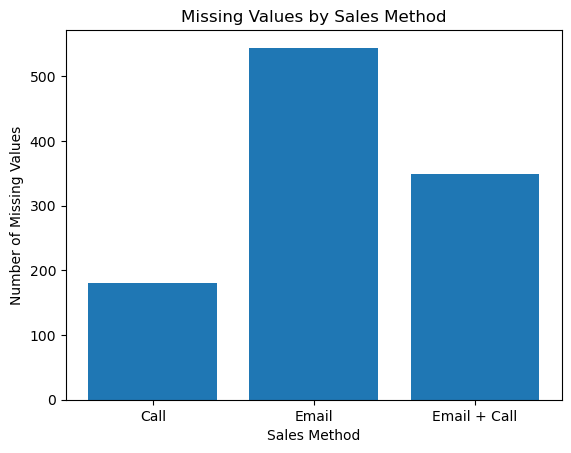

In [11]:
plt.bar(fixed_null_counts.index, fixed_null_counts.values)

plt.xlabel('Sales Method')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Sales Method')

plt.show()


Out of the 1074 missing values presented in the Revenue column, 'Email' accounts for roughly 50% of the missing values **(544/1074 = 50.65%)**, 'Email + Call' accounts for roughly 32% of the missing values **(349/1074 = 32.49%)**, and 'Call' accounts for roughly 17% of the missing values **(181/1074 = 16.85%)**.

From the analysis conducted on the Revenue column, we can see that the distribution of missing values between the sales methods are not equally distributed. The 'Email' sales method takes up a majority of the missing values, followed by 'Email + Call', and the 'Call' methods. 

## Missing Completely At Random? 

It is possible that the sales tracking system used by Caliber Supplies contributed to missing revenue entries for each of the different sales methods. While, there were more missing values for the 'Email' sales method, there isn't a pattern that could allow us to say the values were missing intentionally. In addition, out of 15000 rows, only having 1074 missing values presents us with roughly a 93% success rate of capture **(92.84%)**. This allows us to infer the missing revenue occured due to some sort of technical glitch or other data entry errors. 

## Handling of null/missing values

In [12]:
# Grouping the data by sales_method and counting non-null values in revenue
non_null_counts = product_df.groupby('sales_method')['revenue'].apply(lambda x: x.notnull().sum())

print(non_null_counts)


sales_method
Call            4781
Email           6922
Email + Call    2223
Name: revenue, dtype: int64


In [13]:
# Calculate total count for each sales method
sales_method_stats = pd.DataFrame()
sales_method_stats['total_count'] = product_df['sales_method'].value_counts()

# Calculate the number of non-null revenue values for each sales method
sales_method_stats['non_nulls'] = product_df.groupby('sales_method')['revenue'].apply(lambda x: x.notnull().sum())

# Calculate the number of missing revenue values for each sales method
sales_method_stats['missing'] = sales_method_stats['total_count'] - sales_method_stats['non_nulls']

# Calculate the percentage of missing revenue values for each sales method
sales_method_stats['missing_percentage'] = (sales_method_stats['missing'] / sales_method_stats['total_count']) * 100
sales_method_stats['missing_percentage'] = sales_method_stats['missing_percentage'].round()

# Create the sales table
sales_table = pd.DataFrame(sales_method_stats)
sales_table

,total_count,non_nulls,missing,missing_percentage
Email,7466,6922,544,7.0
Call,4962,4781,181,4.0
Email + Call,2572,2223,349,14.0


Since the Revenue column has 1074 missing values, we can decide to drop the rows with nulls or missing values.
Since the dataset has 15000 rows, 1074 deleted rows would not lead to a signifcant loss of data. Due to the nature of the dataset, filling missing values and nulls with zeros (0s) would not seem appropriate. For instance, weeks with at least one product sold, having a revenue of zero (0) would make no logical sense. Imputation could be an option, replacing the null/missing values with the mean/median. However, it is uncertain revenue could be imputed accurately for the missing values. Imputation could introduce bias and lead to inaccurate analysis.

In [14]:
# drop the rows with missing values in the revenue column
product_df.dropna(subset=['revenue'], inplace=True)

## Did the drop work?

In [15]:
# check the new total of missing values in the revenue column
product_mv = product_df['revenue'].isnull().sum()
print("Number of missing values in Revenue column:", product_mv)

Number of missing values in Revenue column: 0


In [16]:
product_df.shape # check the number of rows and columns in the dataframe after the drop

# the dataframe went from 15000 to 13926 rows

(13926, 8)

In [17]:
product_df.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


## Outliers? - years_as_customers Column

In [18]:
custo_years = product_df['years_as_customer']
custo_years.describe()

count    13926.000000
mean         4.978960
std          5.047828
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: years_as_customer, dtype: float64

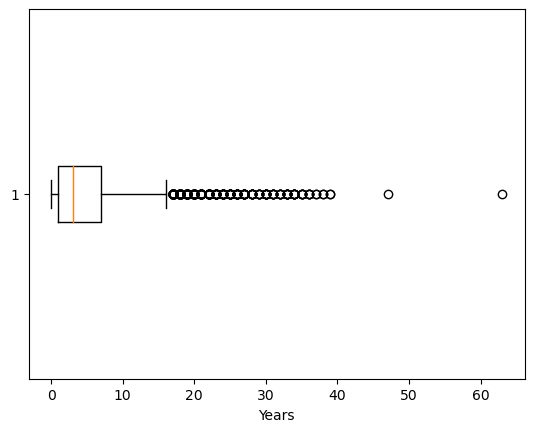

In [19]:
cust_outliers = product_df['years_as_customer']
plt.boxplot(cust_outliers, vert=False)
plt.xlabel('Years')
plt.show()


There seems to be two outliers in the years_as_customer column. The values in this column represent the number of years a customer has shopped at Caliber Supplies. Considering the company was founded in 1984, it is impossible to have customers who have shopped with the business before its creation. The two extreme values are **63 years and 47 years**, both of these values would date back to 1960 and 1976 respectively, which cannot be possible. These values must be dropped. 

In [20]:
product_df = product_df[product_df['years_as_customer'] != 47]
product_df = product_df[product_df['years_as_customer'] != 63]
years_range = product_df['years_as_customer'].max() - product_df['years_as_customer'].min()
years_range

39

Range of years_as_customer: **0 (min) to 39 (max)**

## Correct datatypes?

In [21]:
product_dt = product_df.dtypes
product_dt

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

Every column seems to have the appropriate datatyping. Numerical columns are integer or float types, strings/text are object types.

In [42]:
nb_sold_tot = product_df['nb_sold'].sum()
nb_sold_tot

139798

## Q1. How many customers were there for each approach?


In [22]:
customer_counts = product_df['sales_method'].value_counts()

print("Number of customers per sales method:")
print(customer_counts)


Number of customers per sales method:
Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64


Email was the most successful sales approach with **6,922** customers, followed by call with **4,781** customers. In last was email + call with only **2,223** customers. It is imperative to highlight that the 'email + call' method is not a sum of the two methods, but rather a separate method that involved the business first sending customers their product information and then following up with a 10 minute call the following week.   

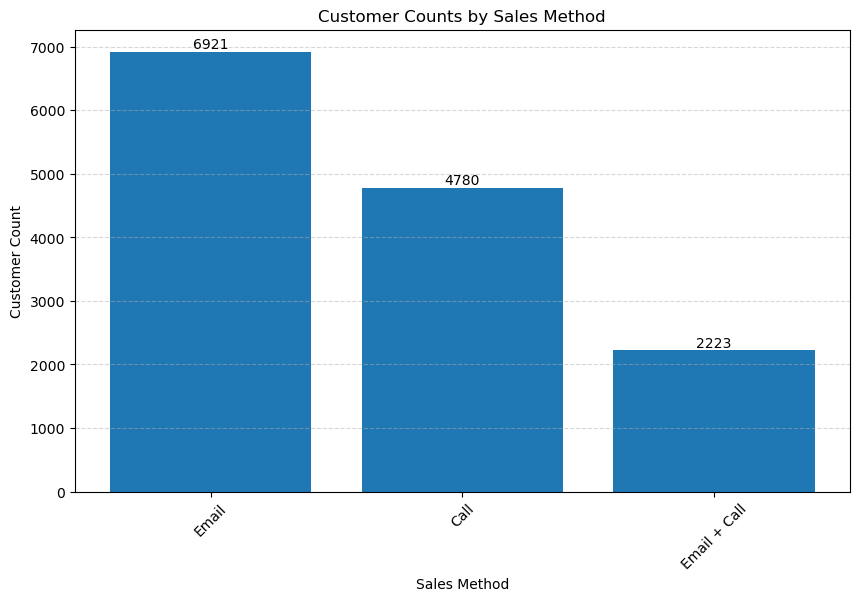

In [23]:
plt.figure(figsize=(10, 6))

plt.bar(customer_counts.index, customer_counts.values)

# Add data labels above each bar
for i, count in enumerate(customer_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Sales Method')
plt.ylabel('Customer Count')
plt.title('Customer Counts by Sales Method')

# Add a grid
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45)

plt.show()

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64


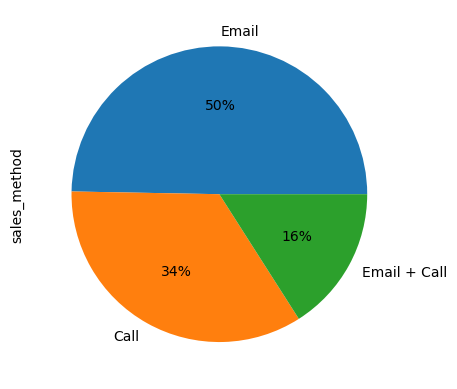

In [24]:
customer_counts = product_df['sales_method'].value_counts()
print(customer_counts)
customer_counts.plot(kind='pie', y=customer_counts.values, autopct='%1.0f%%')
plt.show()

## Q2. What does the spread of the revenue look like overall? And for each method?

In [25]:
# check the summary statistics of revenue column
rev_stats =  product_df['revenue']
rev_sum = rev_stats.describe()
print(rev_sum)

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64


On average, it seems each sale contributes to approximately **93.93** USD to the total revenue. 

A median of **89.5** suggests that 50% of the revenue values fall under **89.50** USD and the other 50% go above 89.50 USD.

A max of **238.32** suggests that the highest revenue collected within a week for any given sales method was 238.32 USD, the min suggests the lowest revenue collected was **32.54** USD.

A standard deviation of approximately **47.43** means that the revenue values deviate from the mean revenue value by approximately 47.43 USD.

The first quartile (25%) suggests 25% of the revenue values in the dataset are equal to or less than **52.47** USD. On the contary, the third quartile (75%) suggests 75% of the revenue values in the dataset are equal to or less than **107.32** USD.

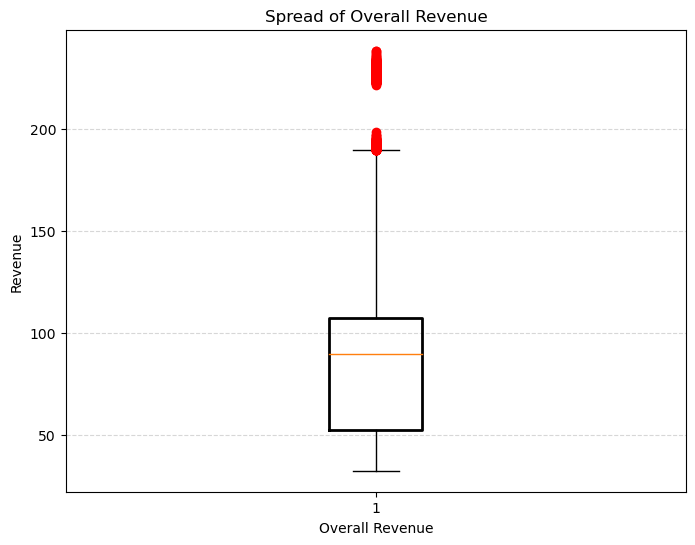

In [26]:
plt.figure(figsize=(8, 6))

boxprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=6, markeredgecolor='red')
plt.boxplot(product_df['revenue'], boxprops=boxprops, flierprops=flierprops)

plt.xlabel('Overall Revenue')
plt.ylabel('Revenue')
plt.title('Spread of Overall Revenue')

plt.grid(axis='y', linestyle='--', alpha=0.5)



plt.show()

The box plot graphic above shows a positive skewed distribution. The right whisker being much longer than the left whisker indiciates that the upper range of values may have outliers or extreme values on the higher end of the distribution. As we relate this to revenue, the outliers or extreme values represent larger sales or high-value transactions. The combination of smaller revenue transactions as well as a subset of larger, high-value transactions that contribute significantly to the overall revenue.

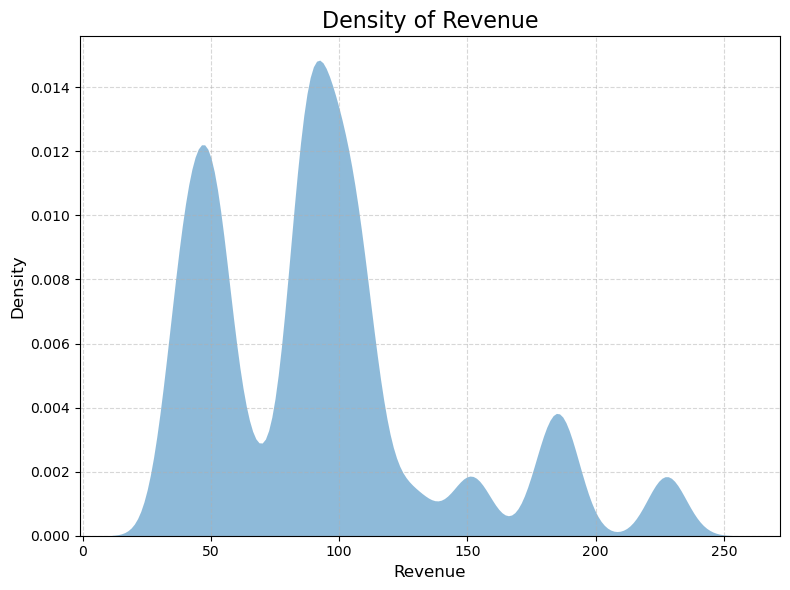

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the KDE plot
sns.kdeplot(data=product_df, x='revenue', fill=True, linewidth=0, alpha=0.5, ax=ax)

ax.set_title('Density of Revenue', fontsize=16)

ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

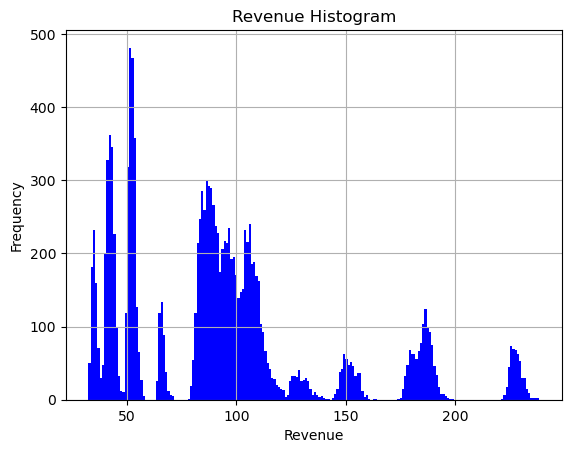

In [28]:
#histogram to represent spread
product_df.hist('revenue', bins = 200, color='blue')

plt.title('Revenue Histogram')
plt.xlabel('Revenue')
plt.ylabel('Frequency')


In general, sales revenue in the **50-60** USD range is the most frequent, however there is a greater range of observations in the **80-110** USD range.

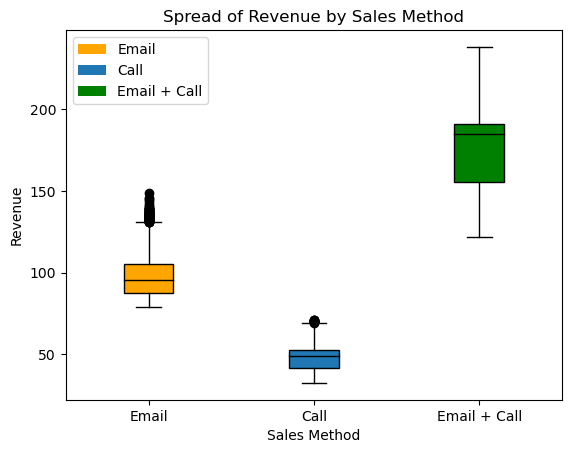

In [29]:
email_revenue = product_df[product_df['sales_method'] == 'Email']['revenue']
call_revenue = product_df[product_df['sales_method'] == 'Call']['revenue']
email_call_revenue = product_df[product_df['sales_method'] == 'Email + Call']['revenue']

boxplot = plt.boxplot([email_revenue, call_revenue, email_call_revenue],
                      patch_artist=True,  
                      whiskerprops={'color': 'black'},
                      capprops={'color': 'black'},
                      medianprops={'color': 'black'},
                      flierprops={'marker': 'o', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})

colors = ['orange', 'tab:blue', 'green']

for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Spread of Revenue by Sales Method')
plt.xticks([1, 2, 3], ['Email', 'Call', 'Email + Call'])

legend_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(legend_patches, ['Email', 'Call', 'Email + Call'])
plt.show()



In [30]:
from scipy.stats import iqr

call = product_df.loc[product_df.sales_method=='Call', 'revenue']
email = product_df.loc[product_df.sales_method=='Email', 'revenue']
email_call = product_df.loc[product_df.sales_method=='Email + Call', 'revenue']

print('Call IQR: ', iqr(call))
print('Email IQR: ', iqr(email))
print('Email + Call IQR: ', iqr(email_call))

Call IQR:  11.21
Email IQR:  17.290000000000006
Email + Call IQR:  35.33500000000001


## Q3. Was there any difference in revenue over time for each of the methods?


In [31]:
# Group the data by week, sales_method, and sum the 'revenue' column
revenue_by_week_method = product_df.groupby(['week', 'sales_method'])['revenue'].sum()

# Convert the resulting Series to a DataFrame
revenue_by_week_method = revenue_by_week_method.reset_index()

# Print the resulting DataFrame
sales = pd.DataFrame(revenue_by_week_method)
sales

,week,sales_method,revenue
0,1,Call,26159.18
1,1,Email,229765.55
2,1,Email + Call,16885.33
3,2,Call,33792.02
4,2,Email,137794.35
5,2,Email + Call,26376.23
6,3,Call,36247.27
7,3,Email,98792.14
8,3,Email + Call,48737.14
9,4,Call,49543.52


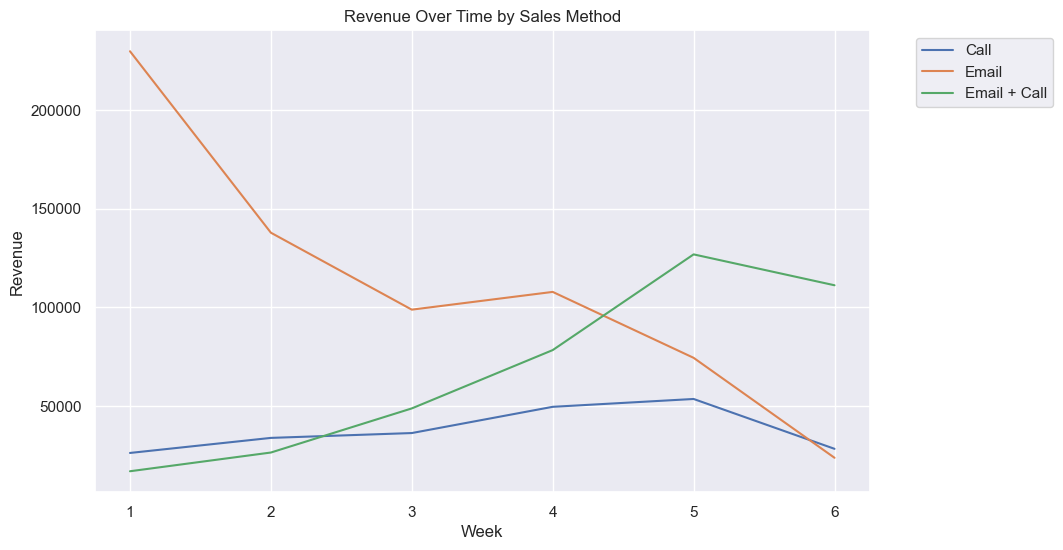

In [32]:
revenue_ot = product_df.groupby(['sales_method', 'week']).sum()['revenue']


sns.set(style='darkgrid')

plt.figure(figsize=(10, 6))

# Group the data by sales method and calculate total revenue for each time period

for method in revenue_ot.index.levels[0]:
    sns.lineplot(data=revenue_ot[method], label=method)

plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue Over Time by Sales Method')

colors = sns.color_palette("Set2", len(revenue_ot.index.levels[0]))
sns.set_palette(colors)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Yes, through the first week Email as the sales method peaked with over 220,000 USD in revenue. However, as the weeks progressed, the Emails sales method declined every week and did not yield the revenue it did in week 1. On the other hand, the Email + Call method, though it had the least amount of customers compared to the email method and call method, it increased in revenue every week and peaked during week 5. Likewise, the call method also peaked in week 5, and seemed to slowly grow since week 1 but was not nearly as impressive in growth.

## Q4. Which method would you recommend we continue to use?

In [33]:
# Group the data by 'sales_method' and sum the 'revenue' column
total_rev = product_df.groupby('sales_method')['revenue'].sum()

# Sort the resulting Series by revenue in descending order
total_rev = total_rev.sort_values(ascending=False)

# Print the sorted Series
sales2 = pd.DataFrame(total_rev)
sales2


,revenue
sales_method,
Email,672220.61
Email + Call,408256.69
Call,227513.02


In [34]:
product_df.groupby('sales_method')['revenue'].mean().to_frame()

,revenue
sales_method,
Call,47.596866
Email,97.127671
Email + Call,183.651233


<AxesSubplot:xlabel='sales_method', ylabel='revenue'>

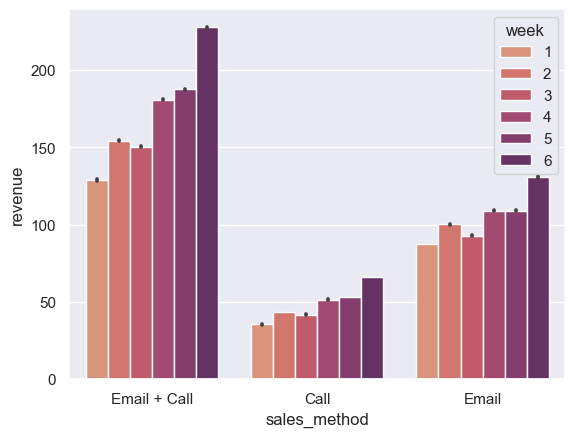

In [35]:
sns.barplot(
    data=product_df, x="sales_method", y="revenue", hue="week", palette="flare")

**Email + Call** method has the **highest** sale revenue average (183 dollars), while **Email** (97 dollars) and **Call** (47 dollars) have lower average revenue.

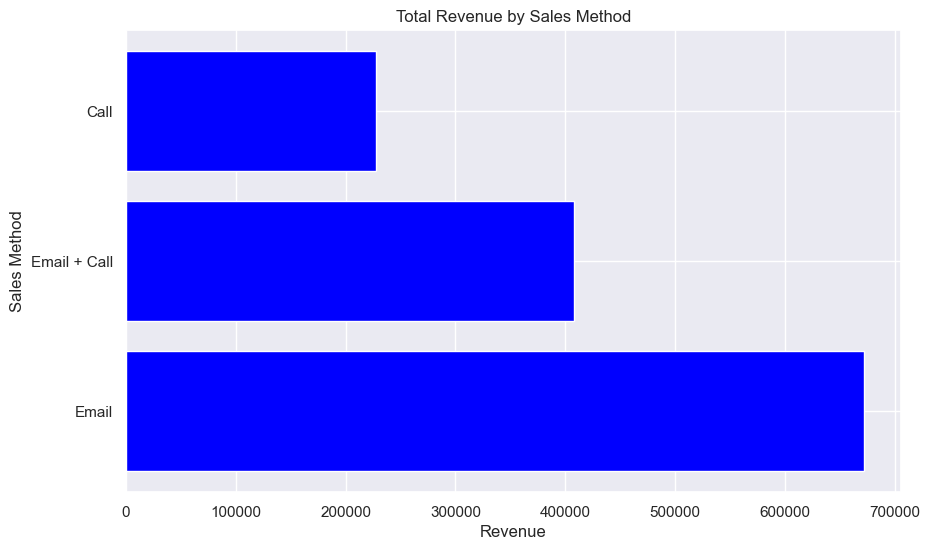

In [36]:
total_rev = product_df.groupby('sales_method')['revenue'].sum()

total_rev = total_rev.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(total_rev.index, total_rev.values, color='blue')

plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.title('Total Revenue by Sales Method')

plt.show()


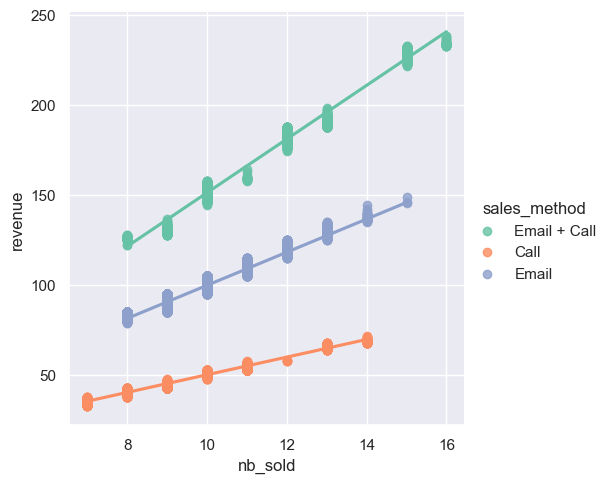

In [37]:
sns.lmplot(
    data=product_df, x="nb_sold", y="revenue", hue="sales_method")

The **Email + Call** method creates more revenue even with the same number of items being sold. This may mean that this method sells products of **higher** retail price.

I recommend that Caliber Supplies should use the **Email + Call** sales approach method as their main way to engage customers and generate revenue. Based on the data, the **Email + Call** method has the highest average sales revenue at around **183** USD. In addition, the **Email + Call** method has the best growth potential overtime. 

I would recommend that the company should consider keeping the **Email** sales method. The implementation of this method is relatively inexpensive, in addition, this method brought in the **most** revenue because it brought in the most customers by far. The company should consider increasing the frequency of their emails to customers to maintain their interest and engagement.

Lastly, I would recommend that the company completely stops using the **Call** method because it is expensive to execute, it is time-consuming, and it averages the **lowest** revenue amounts.


The Email sales method brought in approximately **672,317** USD through six weeks, and the Email + Call method came in second place with approximately **408,256** in USD through six weeks. While I wanted to choose the Email sales method outright, I came across a glaring finding. The Email + Calls sales method was used on only **2,223** customers, that is **4,699** less than the leading Email method and **2,558** less than the second most used method-- the Call method. Yet despite that, the Email + Call method brought in approximately 180,693 USD more than the Call method. 

This entails that the **Email + Call** method happens to grab the attention of customers who are not afraid to make very large purchases with the business, most likely very loyal customers since they were encouraged to purchase after being sent an email and a phone call. The Call method though it brought in nearly 228,000 USD, simply is not as effective in driving in sales as a sole method. 

## Customer Insights

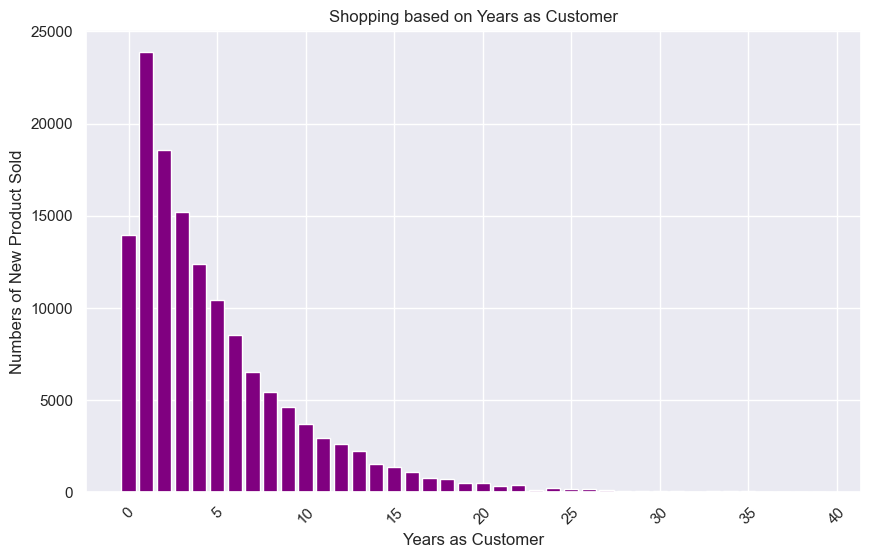

In [38]:
cust_loyalty = product_df.groupby('years_as_customer')['nb_sold'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(cust_loyalty.index, cust_loyalty.values, color='purple')
plt.xlabel('Years as Customer')
plt.ylabel('Numbers of New Product Sold')
plt.title('Shopping based on Years as Customer')
plt.xticks(rotation=45)
plt.show()


From the bar chart graphic above, most customers at Caliber Supplies are customers who have shopped at the business for **5 years or less**. The vast majority as depicted by the peak in the graph have shopped at the business for just one year.

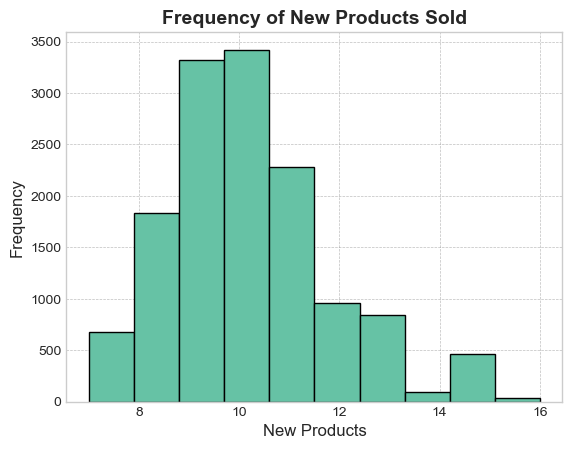

In [39]:
# plot frequency of number of products sold
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots()

# Plot the histogram
ax.hist(product_df['nb_sold'], bins=10, edgecolor='black')

ax.set_title('Frequency of New Products Sold', fontsize=14, fontweight='bold')
ax.set_xlabel('New Products', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Add a grid
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)


# Display the plot
plt.show()


Most products sold seem to be bought in groups between **9-11** products. From the histogram depiction, most customers bought **10** new products.

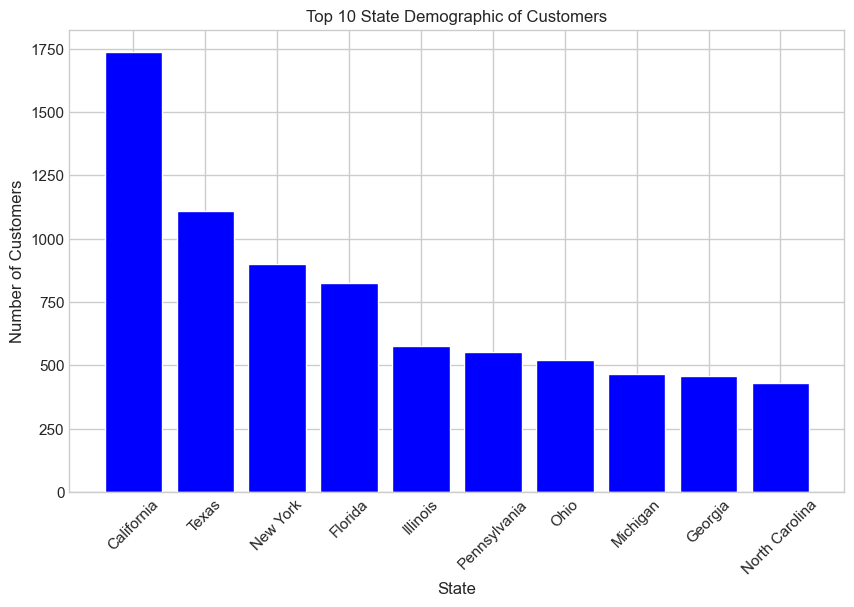

In [40]:
# Get the 10 most common states
state_counts = product_df['state'].value_counts()

top_10_states = state_counts.head(10)

plt.figure(figsize=(10, 6))

# Customize the bar graph
plt.bar(top_10_states.index, top_10_states.values, color='blue')

plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 10 State Demographic of Customers')

plt.xticks(rotation=45)

plt.show()


The top 10 states that buy the most from Caliber Supplies is as follows: **California, Texas, New York, Florida, Illinois, Pennsylvania, Ohio, Michigan, Georgia, and North Carolina**.

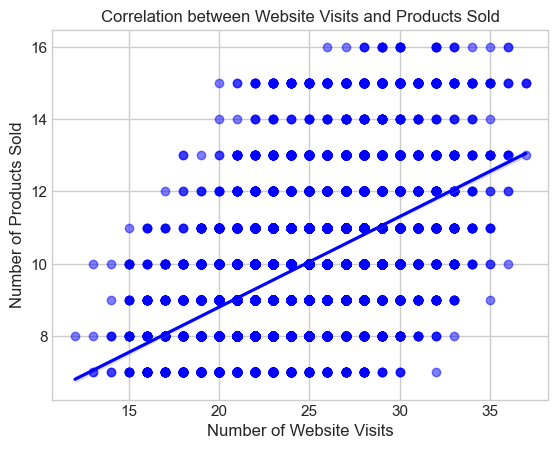

In [41]:
web_visits = product_df['nb_site_visits']
num_products = product_df['nb_sold']

# Creating the scatter plot
sns.regplot(x=web_visits, y=num_products, color='blue', scatter_kws={'alpha': 0.5})

# Adding labels and title
plt.title('Correlation between Website Visits and Products Sold')
plt.xlabel('Number of Website Visits')
plt.ylabel('Number of Products Sold')

# Displaying the plot
plt.show()


In the scatterplot above, there seems to be a **positive correlation between website visits and products sold**. Simply put, **the more website visits, the more products that are sold**.